In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

In [43]:
df_data = pd.read_csv('../../data/drug_sensitivity_lung_CellBlind_test&prediction.csv')
# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
cell_lines = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# cell_lines = ['EKVX','HCC827','NCIH2228','PC14']
df_data = df_data[df_data['cell_line'].isin(cell_lines)]
df_data.head()

,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
9492,9492,5-Fluorouracil,HCC827,5.191741,LUAD,5.472933
9493,9493,5-azacytidine,HCC827,3.595454,LUAD,4.412920
9494,9494,A-366,HCC827,6.028838,LUAD,5.417455
9495,9495,ABT737,HCC827,4.389625,LUAD,2.832198
9496,9496,AGI-5198,HCC827,5.698307,LUAD,5.063128


In [44]:
drugs = {'ABT737', 'Picolinici-acid', 'Osimertinib', 'Oxaliplatin', 'Selumetinib', 'SGC0946', 'AZD7762', 'Olaparib', 'PRIMA-1MET', 'AZD5363', 'LCL161', 'Fulvestrant', 'Irinotecan', 'WEHI-539', 'PRT062607', 'RVX-208', 'Palbociclib', 'PFI-1', 'Ulixertinib', 'Buparlisib', 'Ipatasertib', 'Paclitaxel', 'Epirubicin', 'KU-55933', 'AZD3759', 'PFI3', 'NVP-ADW742', 'JNK Inhibitor VIII', 'SB590885', 'OTX015', 'Tanespimycin', 'SN-38', 'Crizotinib', 'Sabutoclax', 'GSK1904529A', 'AGI-5198', 'RO-3306', 'Sorafenib', 'Bosutinib', 'Nilotinib', 'EHT-1864', 'Dasatinib', 'MK-2206', 'AGI-6780', 'LY2109761', 'Serdemetan', 'Tamoxifen', 'Doramapimod', 'Erlotinib', 'AZD6738', 'Talazoparib', 'Axitinib', 'Rucaparib', 'Niraparib', 'Staurosporine', 'Ribociclib', 'AZ960', 'Lestaurtinib', 'Mirin', 'Veliparib', 'Bortezomib', 'XAV939', 'Dactinomycin', 'CZC24832', 'Refametinib', 'MK-1775', 'Nutlin-3a (-)', 'Savolitinib', 'GSK2578215A', 'Gemcitabine', 'GSK2606414', 'Trametinib', 'CCT007093', 'Taselisib', 'Afatinib', 'Entinostat', 'Vismodegib', 'P22077', '5-Fluorouracil', 'KRAS (G12C) Inhibitor-12', 'Pictilisib', 'Venetoclax', 'IWP-2', 'PCI-34051', 'YK-4-279', 'BMS-536924', 'WZ4003', 'Motesanib', 'Lapatinib', 'EPZ5676', 'Entospletinib', 'AZD8186', 'Linsitinib', 'JQ1', 'Lenalidomide', 'MN-64', 'GDC0810', 'MG-132', 'ML323', 'Leflunomide', 'I-BET-762', 'Wnt-C59', 'ZM447439', 'Navitoclax', 'LGK974', 'PD173074', 'Temozolomide', 'Telomerase Inhibitor IX', 'Cediranib', 'GW441756', 'SB216763', 'Sepantronium bromide', 'Vorinostat', 'Dinaciclib', 'Uprosertib', 'Gefitinib', 'Avagacestat', 'Afuresertib', 'Camptothecin', 'Docetaxel', 'BMS-345541', 'OSI-027', 'AZD4547', 'Ibrutinib', 'Alpelisib', 'MIRA-1', 'I-BRD9', 'Pevonedistat', 'AZD5582', 'PLX-4720', 'Dactolisib', 'BMS-754807', 'Cyclophosphamide', 'Ruxolitinib', 'OF-1', 'EPZ004777', 'VE-822', 'AGK2', 'WIKI4', 'NU7441', 'GSK343','Luminespib'}
# Luminespib PD0325901 SCH772984
# 筛选出drug在drugs中的数据
df_data = df_data[df_data['drug'].isin(drugs)]
print(len(drugs))

142


In [45]:
# 按照drug分组，计算每组IC50与prediction的皮尔逊相关系数
df_data.groupby('drug')[['IC50', 'prediction']].apply(lambda x: x['IC50'].corr(x['prediction']))

drug
5-Fluorouracil    0.467176
ABT737            0.861956
AGI-5198          0.487710
AGI-6780          0.566551
AGK2              0.172662
                    ...   
WZ4003            0.701956
Wnt-C59           0.248447
XAV939            0.340983
YK-4-279          0.378467
ZM447439          0.535152
Length: 142, dtype: float64

In [46]:
drugs_corr = df_data.groupby('drug')[['IC50', 'prediction']].apply(lambda x: x['IC50'].corr(x['prediction']))
drugs_corr = drugs_corr.reset_index()
drugs_corr.columns = ['drug', 'corr']
drugs_corr.head()

,drug,corr
0,5-Fluorouracil,0.467176
1,ABT737,0.861956
2,AGI-5198,0.487710
3,AGI-6780,0.566551
4,AGK2,0.172662


In [55]:
# 将Luminespib的corr设置为-0.372903
drugs_corr.loc[drugs_corr['drug'] == 'Luminespib', 'corr'] = -0.372903

In [56]:
# 画图：按照相关系数排序，画出每个drug的相关系数，从大到小，前15个使用红色，其他用蓝色
drugs_corr = drugs_corr.sort_values(by='corr', ascending=False)
# 重置索引
drugs_corr = drugs_corr.reset_index(drop=True)

In [57]:
drugs_corr['color'] = 'lime'
drugs_corr.loc[drugs_corr.index < 10, 'color'] = 'red'

drugs_corr.head()

,drug,corr,color
0,ABT737,0.861956,red
1,Oxaliplatin,0.852592,red
2,BMS-754807,0.823910,red
3,Nutlin-3a (-),0.820278,red
4,Axitinib,0.817706,red


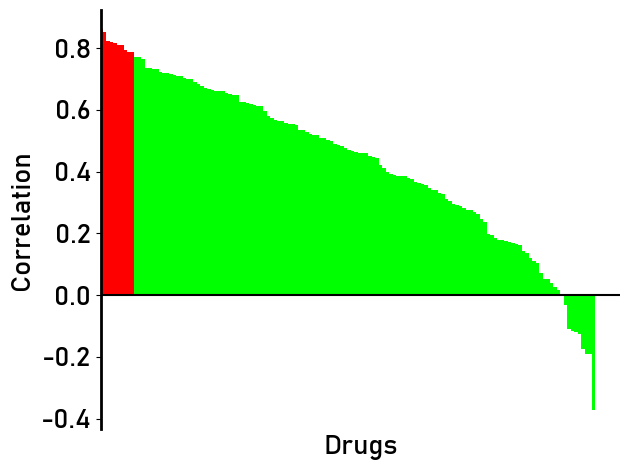

In [60]:
# 画图
# plt.figure(figsize=(8, 6))
plt.bar(x=drugs_corr.index, height=drugs_corr['corr'], color=drugs_corr['color'],width=1)
# 画一条Y=0的线
plt.axhline(y=0, color='black', linestyle='-',)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取消X轴展示
plt.xticks([])
plt.yticks(fontsize=20)
# 规定Y轴范围
# plt.ylim(-0.1, 0.9)
# plt.xticks(drugs_corr.index, drugs_corr['drug'], rotation=90)
plt.xlabel('Drugs', fontsize=20)

plt.ylabel('Correlation', fontsize=20)
# plt.title('Correlation coefficient of drug and prediction', fontsize=25)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
ax.spines['left'].set_linewidth(2)  # Y轴线宽
# plt.ylim(bottom=0.0005)
plt.xlim(left=0)
plt.tight_layout()
plt.savefig('LUNG_all.png', dpi=300)
plt.show()

In [61]:
# 取前10个数据
drugs_corr_top10 = drugs_corr.loc[drugs_corr.index < 10, :]
drugs_corr_top10.head(100)

,drug,corr,color
0,ABT737,0.861956,red
1,Oxaliplatin,0.852592,red
2,BMS-754807,0.823910,red
3,Nutlin-3a (-),0.820278,red
4,Axitinib,0.817706,red
5,Navitoclax,0.809215,red
6,PCI-34051,0.808958,red
7,Picolinici-acid,0.793882,red
8,Docetaxel,0.787717,red
9,Camptothecin,0.786103,red


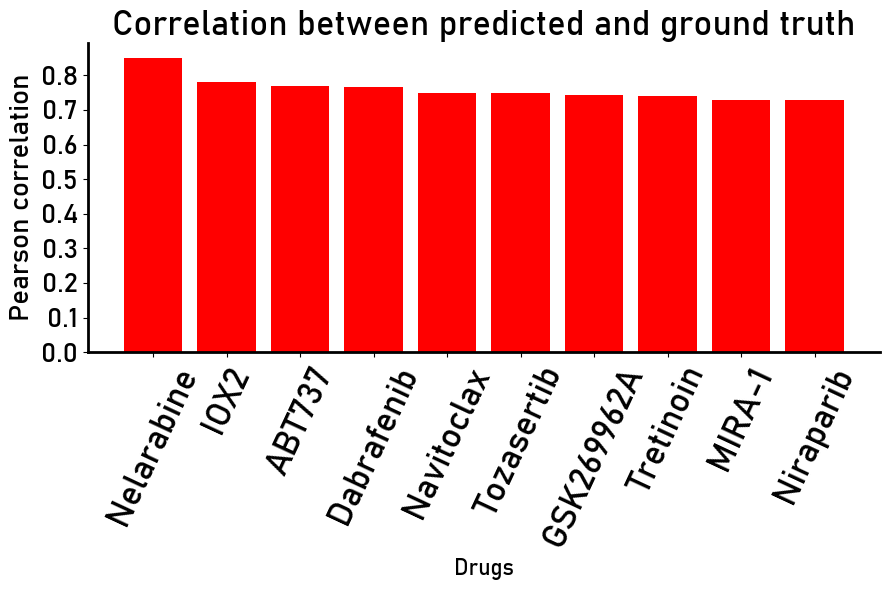

In [42]:

plt.figure(figsize=(9, 6))
plt.bar(x=drugs_corr_top10['drug'], height=drugs_corr_top10['corr'], color=drugs_corr_top10['color'])
# X轴 旋转45度
plt.xticks(drugs_corr_top10['drug'], rotation=65, fontsize=25)
# 规定Y轴范围
# plt.ylim(-0.1, 0.9)
# plt.xticks(drugs_corr.index, drugs_corr['drug'], rotation=90)
plt.xlabel('Drugs', fontsize=16)
plt.yticks(fontsize=20)
plt.xticks(fontsize=25)
plt.ylabel('Pearson correlation', fontsize=20)
plt.title('Correlation between predicted and ground truth', fontsize=25)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)  # X轴线宽
ax.spines['left'].set_linewidth(2)  # Y轴线宽

plt.tight_layout()
plt.savefig('LUNG_top10.png')

plt.show()

## 探索共同药物，以及药物的种类

In [4]:
df_data2 = pd.read_csv('../../data/drug_sensitivity_lung_CellBlind_test&prediction.csv')
# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
cell_lines = ['EKVX','HCC827','NCIH2228','PC14']
df_data2 = df_data2[df_data2['cell_line'].isin(cell_lines)]
df_data2.head()

,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
9492,9492,5-Fluorouracil,HCC827,5.191741,LUAD,5.472933
9493,9493,5-azacytidine,HCC827,3.595454,LUAD,4.412920
9494,9494,A-366,HCC827,6.028838,LUAD,5.417455
9495,9495,ABT737,HCC827,4.389625,LUAD,2.832198
9496,9496,AGI-5198,HCC827,5.698307,LUAD,5.063128


In [7]:
# 根据cell_line分组，求出每个cell_line共同的药物，并且打印出来
df_drugs = df_data2.groupby('cell_line')['drug'].apply(lambda x: set(x))
# 求出交集
common_drugs = df_drugs.iloc[0].intersection(df_drugs.iloc[1], df_drugs.iloc[2], df_drugs.iloc[3])
print(len(common_drugs))
print(common_drugs)

199
{'BMS-536924', 'MK-2206', 'Savolitinib', 'Topotecan', 'GNE-317', 'EHT-1864', 'LJI308', 'glutathione', 'Wee1 Inhibitor', 'NVP-ADW742', 'SGC-CBP30', 'GSK1904529A', 'Sabutoclax', 'OF-1', 'Tanespimycin', 'Gemcitabine', 'IWP-2', 'Gefitinib', 'CCT007093', 'Talazoparib', 'MK-8776', 'Sinularin', 'Dinaciclib', 'AZD7762', 'Vinorelbine', 'PRT062607', 'AGI-5198', 'GSK2606414', 'Veliparib', 'Lapatinib', 'Epirubicin', 'LMP744', 'Carmustine', 'Serdemetan', 'Afatinib', 'Romidepsin', '5-Fluorouracil', 'AT13148', 'MIRA-1', 'Mirin', 'OTX015', 'Lestaurtinib', 'Gallibiscoquinazole', 'Temsirolimus', 'Fludarabine', 'Schweinfurthin A', 'Ruxolitinib', 'Vincristine', 'N-acetyl cysteine', 'Navitoclax', 'SB590885', 'Teniposide', 'BI-2536', 'SN-38', 'GSK2110183B', 'I-BRD9', 'ZM447439', 'Paclitaxel', 'Selumetinib', 'Dihydrorotenone', 'GSK591', 'GSK343', 'Lenalidomide', 'Crizotinib', 'Dactolisib', 'Bromosporine', 'Pevonedistat', 'AZD3759', 'Wnt-C59', 'SCH772984', 'alpha-lipoic acid', 'Irinotecan', 'WZ4003', 'Ced